# 3. Hydro: Get Sub-Regions of The Loaded Data

## Load the Data

In [1]:
using Mera, PyPlot
using ColorSchemes
cmap = ColorMap(ColorSchemes.lajolla.colors) # See http://www.fabiocrameri.ch/colourmaps.php

info = getinfo(400, "../../testing/simulations/manu_sim_sf_L14")
gas  = gethydro(info, :rho, lmax=10, smallr=1e-5); 

[Mera]: 2020-02-18T23:23:22.753

Code: RAMSES
output [400] summary:
mtime: 2018-09-05T09:51:55.041
ctime: 2019-11-01T17:35:21.051
simulation time: 594.98 [Myr]
boxlen: 48.0 [kpc]
ncpu: 2048
ndim: 3
-------------------------------------------------------
amr:           true
level(s): 6 - 14 --> cellsize(s): 750.0 [pc] - 2.93 [pc]
-------------------------------------------------------
hydro:         true
hydro-variables:  7  --> (:rho, :vx, :vy, :vz, :p, :var6, :var7)
hydro-descriptor: (:density, :velocity_x, :velocity_y, :velocity_z, :thermal_pressure, :passive_scalar_1, :passive_scalar_2)
γ: 1.6667
-------------------------------------------------------
gravity:       true
gravity-variables: (:epot, :ax, :ay, :az)
-------------------------------------------------------
particles:     true
- Npart:    5.091500e+05 
- Nstars:   5.066030e+05 
- Ndm:      2.547000e+03 
particle variables: (:vx, :vy, :vz, :mass, :birth)
-------------------------------------------------------
clumps:       

100%|███████████████████████████████████████████████████| Time: 0:02:49


Memory used for data table :186.1558656692505 MB
-------------------------------------------------------



## Cuboid Region

### Create projections of the full box:

In [2]:
proj_z = projection(gas, :sd, :Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(gas, :sd, :Msol_pc2, center=[:boxcenter], direction=:y, verbose=false);
proj_x = projection(gas, :sd, :Msol_pc2, center=[:boxcenter], direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:03


The generated objects include, e.g. the extent of the processed domain, that can be used to declare the specific range of the plots, while the field `cextent` gives the extent related to a given center (default: [0.,0.,0.]).

In [3]:
propertynames(proj_z)

(:maps, :maps_unit, :maps_lmax, :maps_mode, :lmax_projected, :lmin, :lmax, :ranges, :extent, :cextent, :ratio, :boxlen, :smallr, :smallc, :scale, :info)

#### Cuboid Region: The red lines show the region that we want to cutout as a sub-region from the full data:

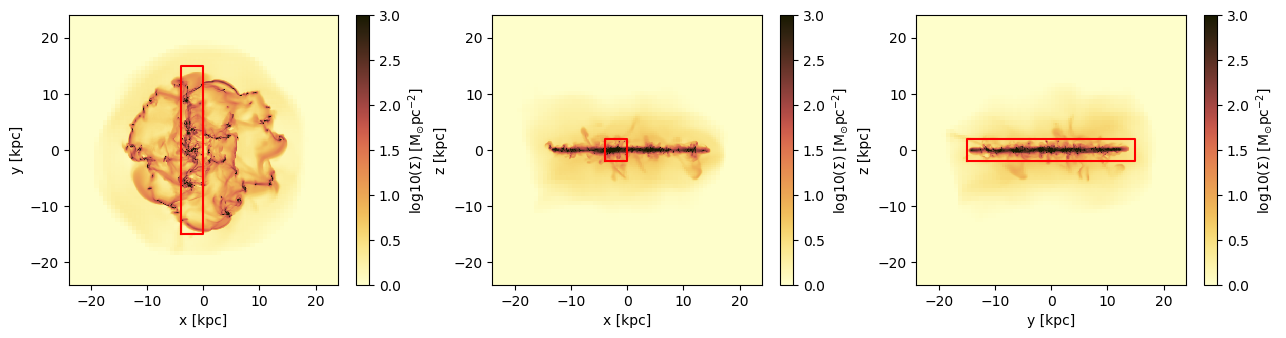

In [4]:
figure(figsize=(15.5, 3.5))
labeltext = L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot([-4.,0.,0.,-4.,-4.],[-15.,-15.,15.,15.,-15.], color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap=cmap, aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-4.,0.,0.,-4.,-4.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap=cmap, aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-15.,15.,15.,-15.,-15.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Cuboid Region: Cutout the data assigned to the object `gas`

Note: The selected regions can be given relative to a user given center or to the box corner [0., 0., 0.] by default. The user can choose between standard notation [0:1] (default) or physical length-units, defined in e.g. info.scale :

In [5]:
gas_subregion = subregion( gas, :cuboid, 
                            xrange=[-4., 0.], 
                            yrange=[-15., 15.], 
                            zrange=[-2., 2.], 
                            center=[:boxcenter], 
                            range_unit=:kpc);

[Mera]: 2020-02-18T23:27:06.861

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.4166667 :: 0.5  	==> 20.0 [kpc] :: 24.0 [kpc]
ymin::ymax: 0.1875 :: 0.8125  	==> 9.0 [kpc] :: 39.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Memory used for data table :47.87415790557861 MB
-------------------------------------------------------



The function `subregion` creates a new object with the same type as the object created by the function `gethydro` :

In [6]:
typeof(gas_subregion)

HydroDataType

#### Cuboid Region: Projections of the sub-region. 
The coordinates center is the center of the box:

In [7]:
proj_z = projection(gas_subregion, :sd, :Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, :Msol_pc2, center=[:boxcenter], direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, :Msol_pc2, center=[:boxcenter], direction=:x, verbose=false);

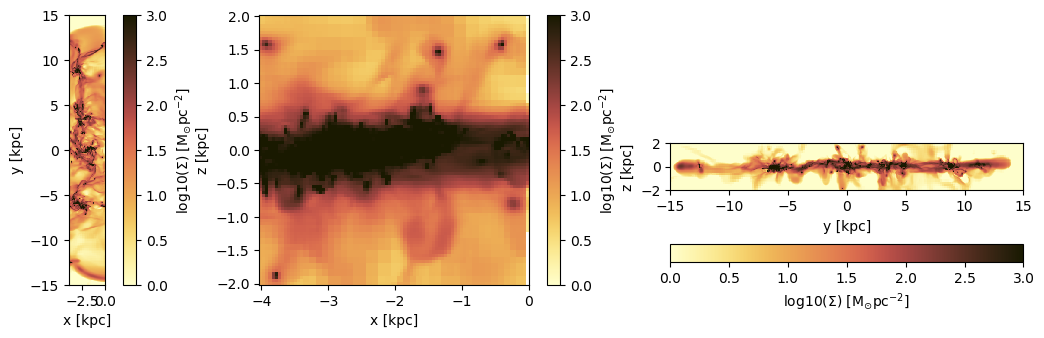

In [8]:
figure(figsize=(15.5, 3.5))
labeltext = L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap=cmap, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap=cmap, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("y [kpc]")
ylabel("z [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, orientation="horizontal", label=labeltext, pad=0.2);

#### Cuboid Region: Get the data outside of the selected region (inverse selection):

In [9]:
gas_subregion = subregion( gas, :cuboid,
                            xrange=[-4., 0.], 
                            yrange=[-15., 15.],
                            zrange=[-2., 2.], 
                            center=[:boxcenter], 
                            range_unit=:kpc, 
                            inverse=true);

[Mera]: 2020-02-18T23:27:09.597

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.4166667 :: 0.5  	==> 20.0 [kpc] :: 24.0 [kpc]
ymin::ymax: 0.1875 :: 0.8125  	==> 9.0 [kpc] :: 39.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Memory used for data table :138.2824068069458 MB
-------------------------------------------------------



In [10]:
proj_z = projection(gas_subregion, :sd, :Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, :Msol_pc2, center=[:boxcenter], direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, :Msol_pc2, center=[:boxcenter], direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:01


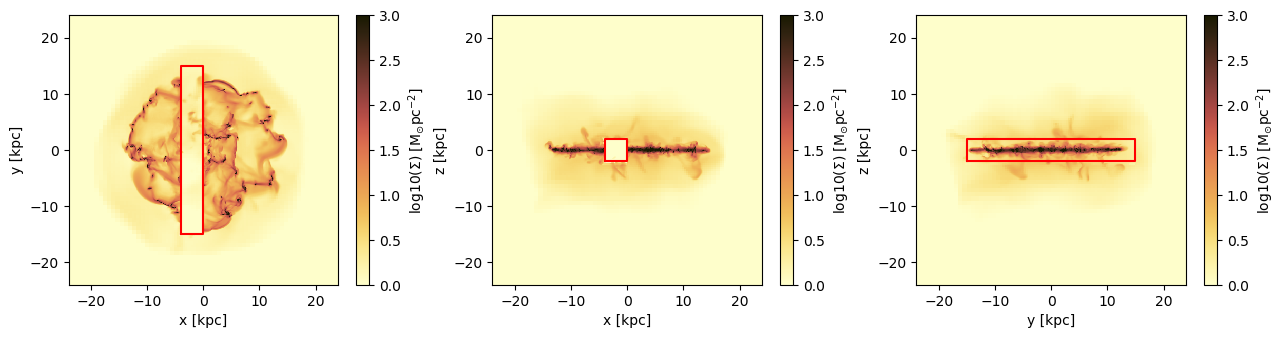

In [11]:
figure(figsize=(15.5, 3.5))
labeltext = L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot([-4.,0.,0.,-4.,-4.],[-15.,-15.,15.,15.,-15.], color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap=cmap, aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-4.,0.,0.,-4.,-4.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap=cmap, aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-15.,15.,15.,-15.,-15.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

## Cylindrical Region
#### Create projections of the full box:

In [12]:
proj_z = projection(gas, :sd, :Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(gas, :sd, :Msol_pc2, center=[:boxcenter], direction=:y, verbose=false);
proj_x = projection(gas, :sd, :Msol_pc2, center=[:boxcenter], direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:01
100%|███████████████████████████████████████████████████| Time: 0:00:01


#### Cylindrical Region: The red lines show the region that we want to cutout as a sub-region from the full data:

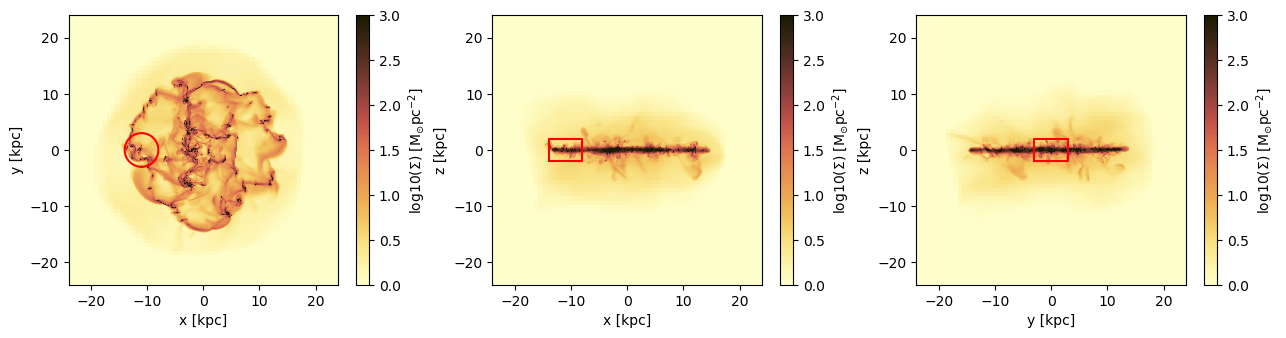

In [13]:
figure(figsize=(15.5, 3.5))
labeltext = L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 3. .* sin.(theta) .-11, 3 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap=cmap, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-3.,3.,3.,-3.,-3.] .-11.,[-2.,-2.,2.,2.,-2.], color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-3.,3.,3.,-3.,-3.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Cylindrical Region: Cutout the data assigned to the object `gas`
Select the ranges of the cylinder in the unit "kpc", relative to the given center [13., 24., 24.]. The height refers to both z-directions from the plane.

In [14]:
gas_subregion = subregion(  gas, :cylinder,
                            radius=3., 
                            height=2., 
                            range_unit=:kpc, 
                            center=[13., :bc, :bc]); # direction=:z, by default

[Mera]: 2020-02-18T23:27:24.715

center: [0.2708333, 0.5, 0.5] ==> [13.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2083333 :: 0.3333333  	==> 10.0 [kpc] :: 16.0 [kpc]
ymin::ymax: 0.4375 :: 0.5625  	==> 21.0 [kpc] :: 27.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Radius: 3.0 [kpc]
Height: 2.0 [kpc]
Memory used for data table :9.945767402648926 MB
-------------------------------------------------------



#### Cylindrical Region: Projections of the sub-region. 
The coordinates center is the center of the box:

In [15]:
proj_z = projection(gas_subregion, :sd, :Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, :Msol_pc2, center=[:boxcenter], direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, :Msol_pc2, center=[:boxcenter], direction=:x, verbose=false);

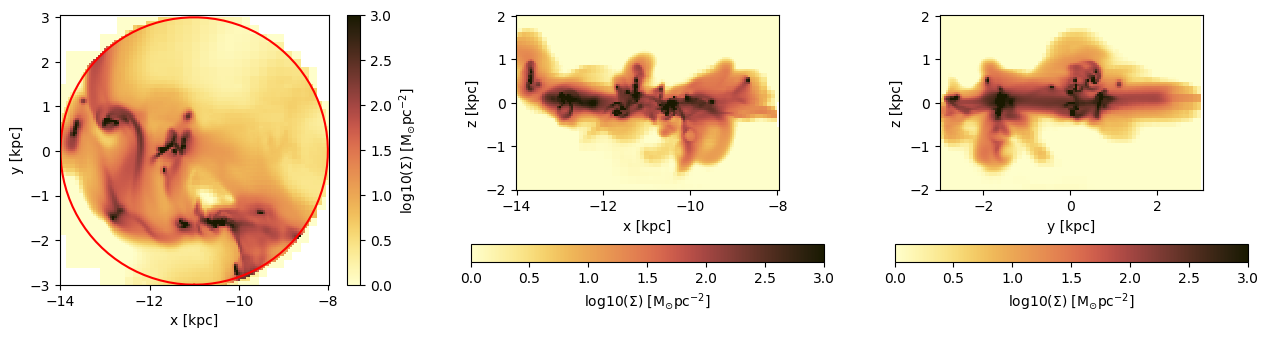

In [16]:
figure(figsize=(15.5, 3.5))
labeltext = L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 3. .* sin.(theta) .-11, 3 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap=cmap, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)

xlabel("x [kpc]")
ylabel("z [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, orientation="horizontal", label=labeltext, pad=0.2);

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)

xlabel("y [kpc]")
ylabel("z [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, orientation="horizontal", label=labeltext, pad=0.2);

#### Cylindrical Region: Projections of the sub-region rekated ti a given data center:

In [17]:
proj_z = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:z, center=[13., 24.,24.], range_unit=:kpc, verbose=false);
proj_y = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:y, center=[13., 24.,24.], range_unit=:kpc, verbose=false);
proj_x = projection(gas_subregion, :sd, unit=:Msol_pc2, direction=:x, center=[13., 24.,24.], range_unit=:kpc, verbose=false);

#### The ranges of the plots are now adapted to the given data center:

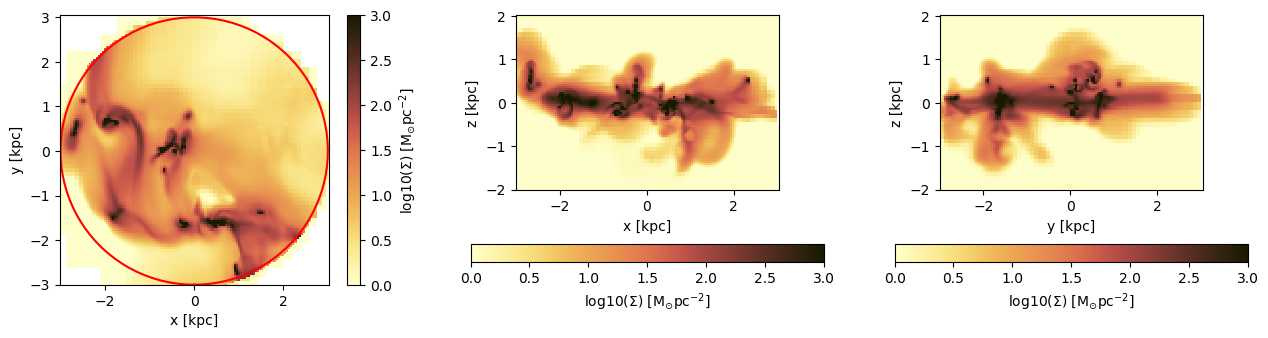

In [18]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 3. .* sin.(theta), 3 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap=cmap, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)

xlabel("x [kpc]")
ylabel("z [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, orientation="horizontal", label=labeltext, pad=0.2);

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)

xlabel("y [kpc]")
ylabel("z [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, orientation="horizontal", label=labeltext, pad=0.2);

#### Cylindrical Region: Get the data outside of the selected region (inverse selection):

In [19]:
gas_subregion = subregion(  gas, :cylinder, 
                            radius=3., 
                            height=2., 
                            range_unit=:kpc, 
                            center=[13.,:bc,:bc], 
                            inverse=true); # direction=:z, by default

[Mera]: 2020-02-18T23:27:29.071

center: [0.2708333, 0.5, 0.5] ==> [13.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2083333 :: 0.3333333  	==> 10.0 [kpc] :: 16.0 [kpc]
ymin::ymax: 0.4375 :: 0.5625  	==> 21.0 [kpc] :: 27.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Radius: 3.0 [kpc]
Height: 2.0 [kpc]
Memory used for data table :176.2107973098755 MB
-------------------------------------------------------



In [20]:
proj_z = projection(gas_subregion, :sd, :Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, :Msol_pc2, center=[:boxcenter], direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, :Msol_pc2, center=[:boxcenter], direction=:x, verbose=false);

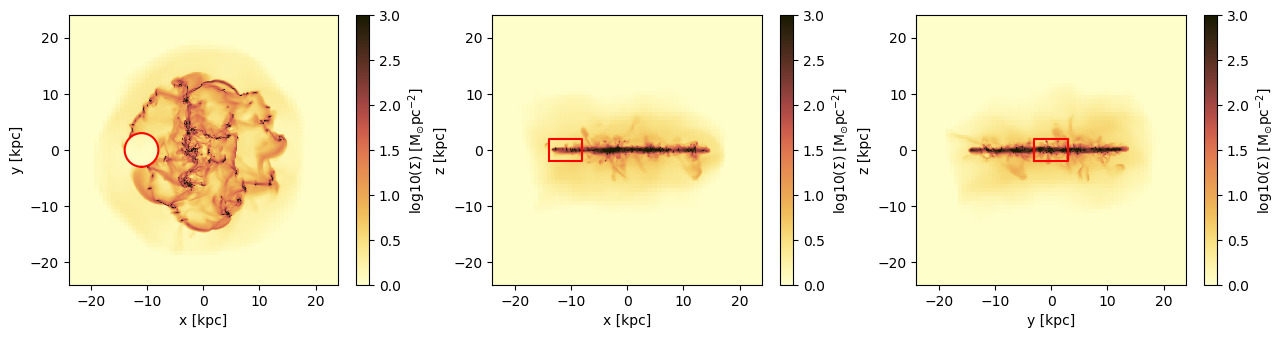

In [21]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 3. .* sin.(theta) .-11, 3 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap=cmap, aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-3.,3.,3.,-3.,-3.] .-11.,[-2.,-2.,2.,2.,-2.], color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap=cmap, aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-3.,3.,3.,-3.,-3.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

## Spherical Region
### Create projections of the full box:

In [22]:
proj_z = projection(gas, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(gas, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, verbose=false);
proj_x = projection(gas, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:01


#### Spherical Region: The red lines show the region that we want to cutout as a sub-region from the full data:

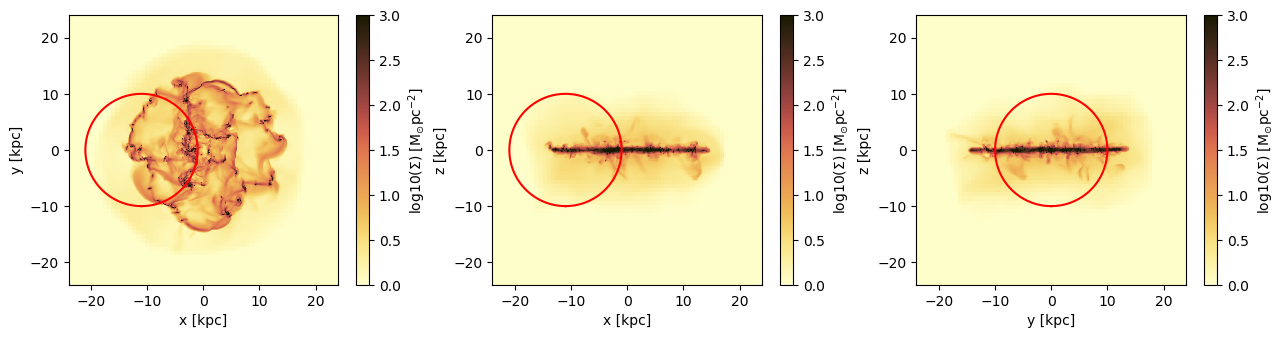

In [23]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap=cmap, aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap=cmap, aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Spherical Region: Cutout the data assigned to the object `gas`
Select the radius of the sphere in the unit "kpc", relative to the given center [13., 24., 24.]:

In [24]:
gas_subregion = subregion(  gas, :sphere, 
                            radius=10., 
                            range_unit=:kpc, 
                            center=[13.,:bc,:bc]);

[Mera]: 2020-02-18T23:27:42.261

center: [0.2708333, 0.5, 0.5] ==> [13.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.0625 :: 0.4791667  	==> 3.0 [kpc] :: 23.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]

Radius: 10.0 [kpc]
Memory used for data table :57.03980731964111 MB
-------------------------------------------------------



#### Spherical Region: Projections of the sub-region. 
The coordinates center is the center of the box:

In [25]:
proj_z = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, verbose=false);

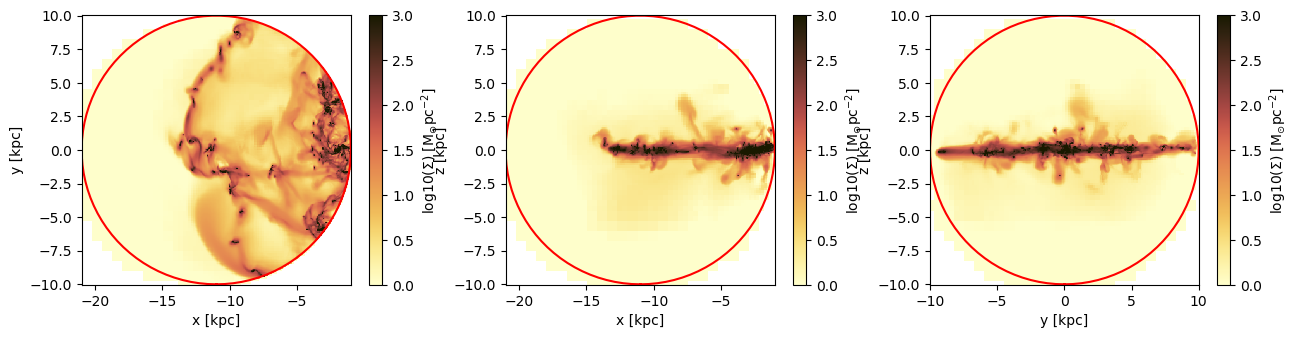

In [26]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap=cmap, aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap=cmap, aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Spherical Region: Get the data outside of the selected region (inverse selection):

In [27]:
gas_subregion = subregion(  gas, :sphere, 
                            radius=10., 
                            range_unit=:kpc, 
                            center=[13.,:bc,:bc], 
                            inverse=true);

[Mera]: 2020-02-18T23:27:46.433

center: [0.2708333, 0.5, 0.5] ==> [13.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.0625 :: 0.4791667  	==> 3.0 [kpc] :: 23.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]

Radius: 10.0 [kpc]
Memory used for data table :129.1167573928833 MB
-------------------------------------------------------



In [28]:
proj_z = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, verbose=false);

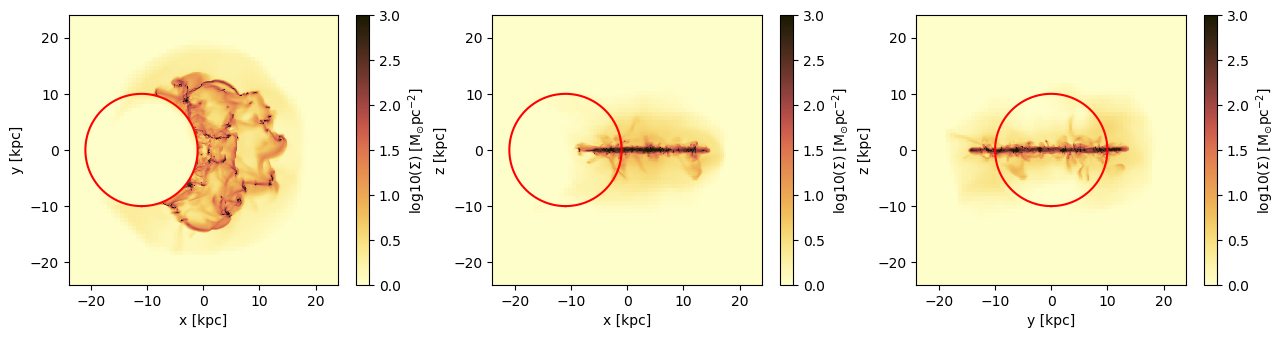

In [29]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap=cmap, aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap=cmap, aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

## Combined/Nested/Shell Sub-Regions

#### The sub-region functions can be used in any combination with each other! (Combined with overlapping or nested ranges)

One Example:

In [30]:
comb_region = subregion(gas, :cuboid, xrange=[-8.,8.], yrange=[-8.,8.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc, verbose=false)
comb_region2 = subregion(comb_region, :sphere, radius=12., center=[40.,24.,24.], range_unit=:kpc, inverse=true, verbose=false)
comb_region3 = subregion(comb_region2, :sphere, radius=12., center=[8.,24.,24.], range_unit=:kpc, inverse=true, verbose=false);
comb_region4 = subregion(comb_region3, :sphere, radius=12., center=[24.,5.,24.], range_unit=:kpc, inverse=true, verbose=false);
comb_region5 = subregion(comb_region4, :sphere, radius=12., center=[24.,43.,24.], range_unit=:kpc, inverse=true, verbose=false);

In [31]:
proj_z = projection(comb_region5, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(comb_region5, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, verbose=false);
proj_x = projection(comb_region5, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, verbose=false);

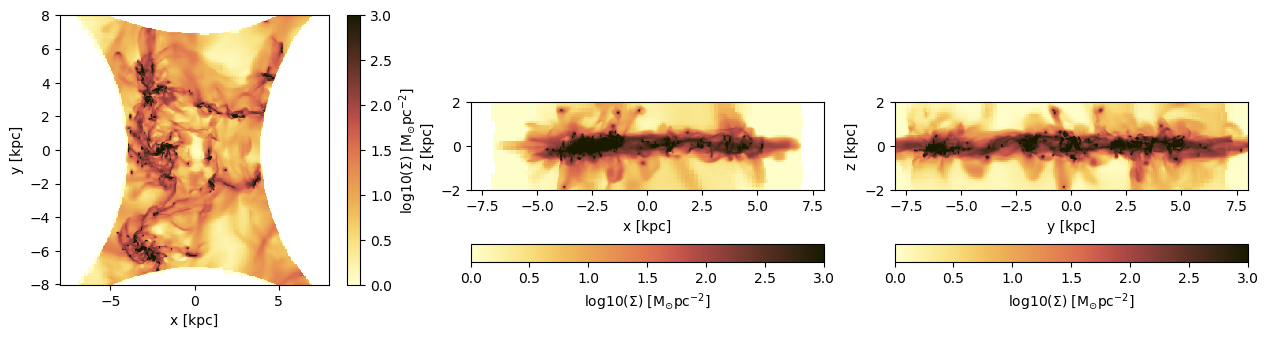

In [32]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap=cmap, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, orientation="horizontal", label=labeltext, pad=0.2)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("y [kpc]")
ylabel("z [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, orientation="horizontal", label=labeltext, pad=0.2);

## Cylindrical Shell
#### Create projections of the full box:

In [33]:
proj_z = projection(gas, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(gas, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, verbose=false);
proj_x = projection(gas, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:02


#### Cylindrical Shell: The red lines show the shell that we want to cutout as a sub-region from the full data:

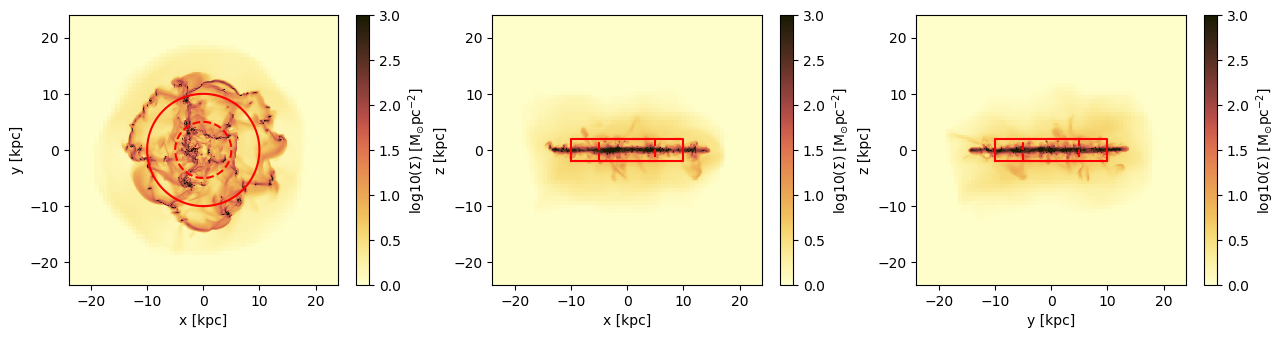

In [34]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap=cmap, aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap=cmap, aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Cylindrical Shell: 
Pass the height of the cylinder and the inner/outer radius of the shell in the unit "kpc", relative to the box center [24., 24., 24.]:

In [35]:
gas_subregion = shellregion( gas, :cylinder, 
                            radius=[5., 10.], 
                            height=2., 
                            range_unit=:kpc, 
                            center=[:boxcenter]);

[Mera]: 2020-02-18T23:28:03.834

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Inner radius: 5.0 [kpc]
Outer radius: 10.0 [kpc]
Radius diff: 5.0 [kpc]
Height: 2.0 [kpc]
Memory used for data table :53.790066719055176 MB
-------------------------------------------------------



In [36]:
proj_z = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, verbose=false);

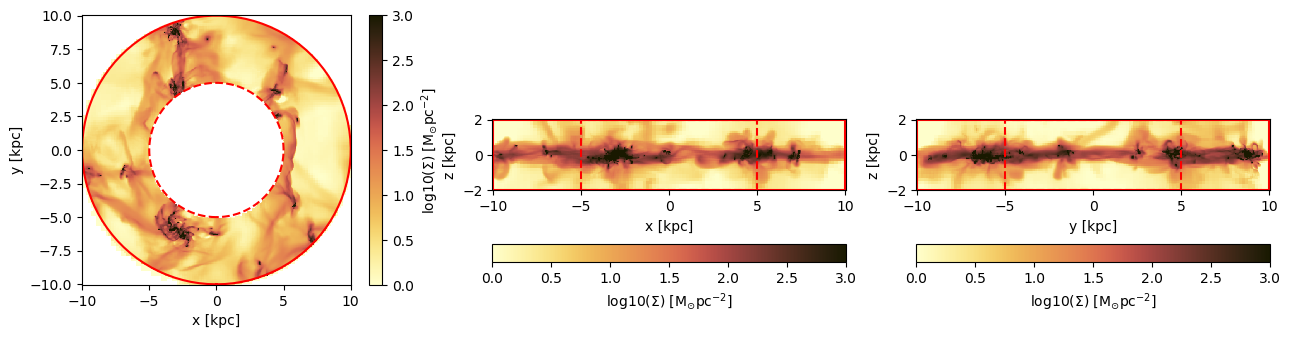

In [37]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap=cmap, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, orientation="horizontal", label=labeltext, pad=0.2)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, orientation="horizontal", label=labeltext, pad=0.2);

#### Cylindrical Shell: Get the data outside of the selected shell (inverse selection):

In [38]:
gas_subregion = shellregion(gas, :cylinder, 
                            radius=[5., 10.], 
                            height=2., 
                            range_unit=:kpc, 
                            center=[:boxcenter], 
                            inverse=true);

[Mera]: 2020-02-18T23:28:06.945

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Inner radius: 5.0 [kpc]
Outer radius: 10.0 [kpc]
Radius diff: 5.0 [kpc]
Height: 2.0 [kpc]
Memory used for data table :132.36649799346924 MB
-------------------------------------------------------



In [39]:
proj_z = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, verbose=false);

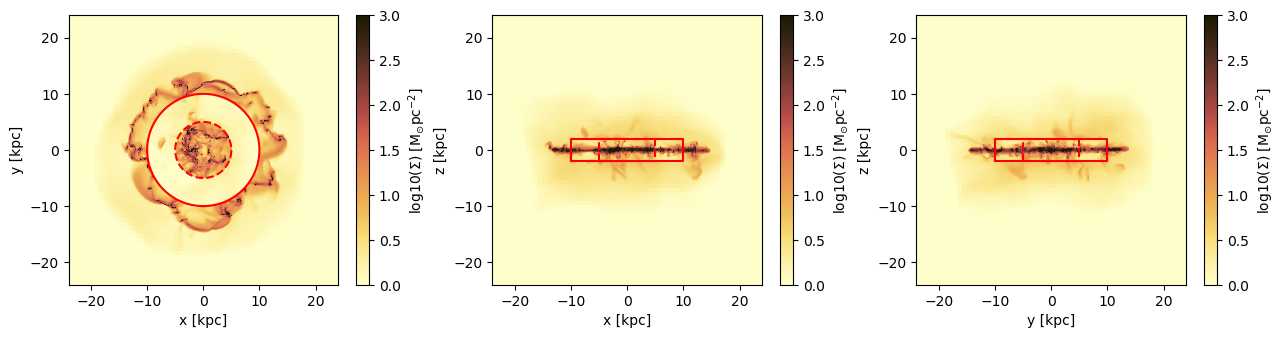

In [40]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap=cmap, aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap=cmap, aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

## Spherical Shell
#### Create projections of the full box:

In [41]:
proj_z = projection(gas, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(gas, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, verbose=false);
proj_x = projection(gas, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, verbose=false);

100%|███████████████████████████████████████████████████| Time: 0:00:02
100%|███████████████████████████████████████████████████| Time: 0:00:02
100%|███████████████████████████████████████████████████| Time: 0:00:01


#### Spherical Shell: The red lines show the shell that we want to cutout as a sub-region from the full data:

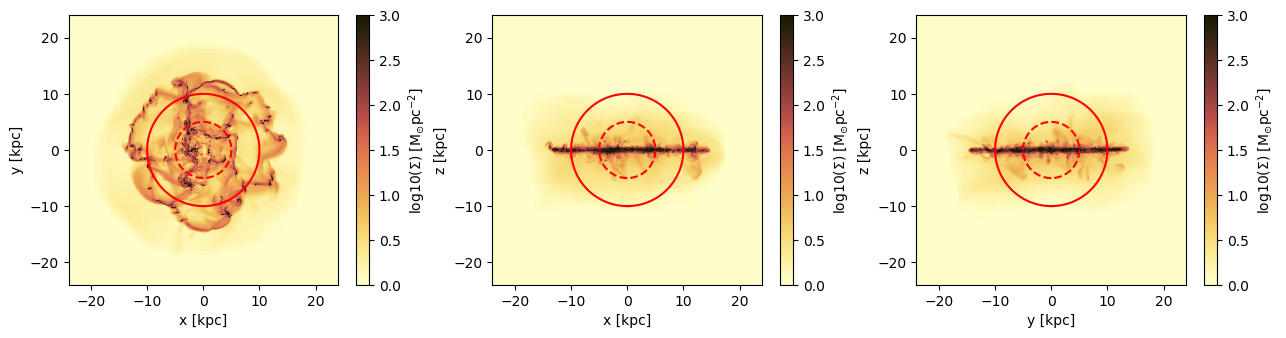

In [42]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red",ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap=cmap, aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap=cmap, aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Spherical Shell: 
Select the inner and outer radius of the spherical shell in unit "kpc", relative to the box center [24., 24., 24.]:

In [43]:
gas_subregion = shellregion(gas, :sphere, 
                            radius=[5., 10.], 
                            range_unit=:kpc, 
                            center=[24.,24.,24.]);

[Mera]: 2020-02-18T23:28:21.357

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]

Inner radius: 5.0 [kpc]
Outer radius: 10.0 [kpc]
Radius diff: 5.0 [kpc]
Memory used for data table :56.55305194854736 MB
-------------------------------------------------------



#### Spherical Shell: Projections of the shell-region. 
The coordinates center is the center of the box:

In [44]:
proj_z = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, verbose=false);

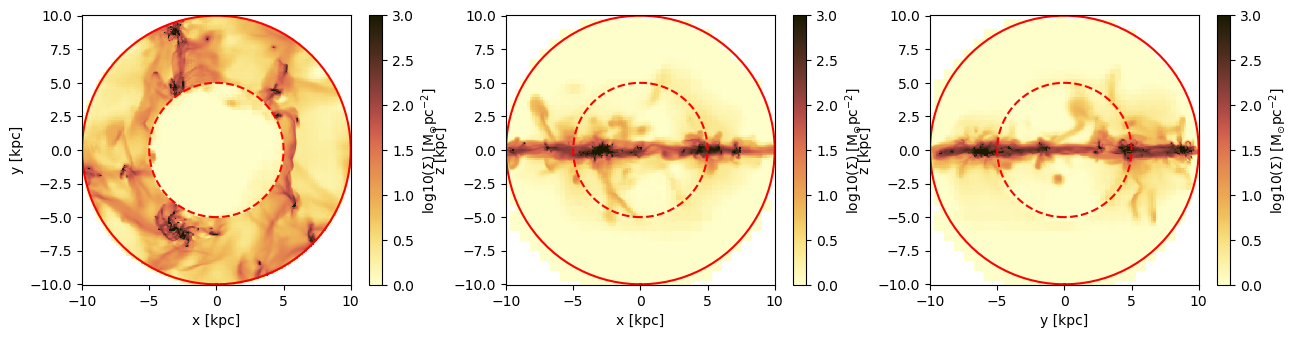

In [45]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap=cmap, aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap=cmap, aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Spherical Shell: Get the data outside of the selected shell-region (inverse selection):

In [46]:
gas_subregion = shellregion(gas, :sphere,
                            radius=[5., 10.], 
                            range_unit=:kpc, 
                            center=[:boxcenter], 
                            inverse=true);

[Mera]: 2020-02-18T23:28:25.267

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]

Inner radius: 5.0 [kpc]
Outer radius: 10.0 [kpc]
Radius diff: 5.0 [kpc]
Memory used for data table :129.60351276397705 MB
-------------------------------------------------------



In [47]:
proj_z = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, verbose=false);
proj_x = projection(gas_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, verbose=false);

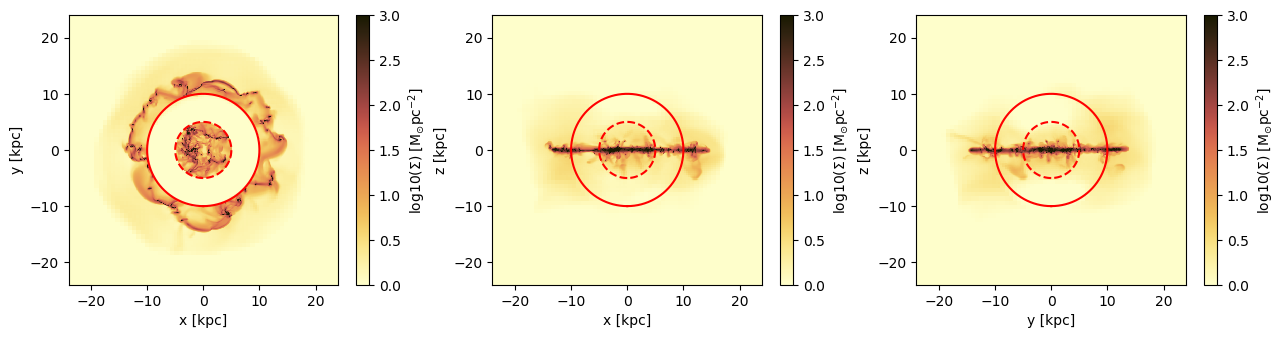

In [48]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap=cmap, aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap=cmap, aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);